# Jesus Eduardo Torres 166079


## ¿Tienes datos relevantes y suficientes para la pregunta que queremos contestar?
#### "un vuelo tendrá demora en su salida o no."

Relevantes: Sí son datos que tienen que ver con el tema, son mas de 31 variables sobre vuelos, y justo ese es el tema de la pregunta.

Suficientes: Esta es la pregunta dificil y depende. Puede que un año sea totalmente distinto al otro, en ese caso me hubiera gustado tener datos de varios años. Y aun asi hay años raros como el 2020 que son totalmente inpredecibles. Yo creo que los datos sí son suficientes para poder realizar una buena prediccion. Sin embargo, una prediccion nunca va a ser perfecta y mientras mas tiempo pase desde los datos origen menos lo sera, asi que yo opino que para el 2015 y quiza el inicio del 2016 si eran suficientes para contestar la pregunta bastante bien. 


In [2]:
import pandas as pd
import numpy as np

In [3]:
from pandas_profiling import ProfileReport

In [4]:
def rename_columns(column):
    new_name = column.lower().\
    replace(" ","_").\
    replace("/","_").\
    replace("á","a").\
    replace("é","e").\
    replace("í","i").\
    replace("ó","o").\
    replace("ú","u")
    
    return new_name

In [5]:
# Cargo datos y dejo columnas bonitas
flights = pd.read_csv("/home/edu/Things/flights.csv")
flights.rename(columns={element: rename_columns(element) for element in flights.columns.values}, 
             inplace=True)

flights.head()

/home/edu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checo extension y me asombro
flights.shape

(5819079, 31)

In [7]:
# dejo los nombres de las columnas bonitas y cargo datos
airports = pd.read_csv("/home/edu/Things/airports.csv")
airports.rename(columns={element: rename_columns(element) for element in airports.columns.values}, 
             inplace=True)

airports.head()

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
# cargo datos de airlines
airlines = pd.read_csv("/home/edu/Things/airlines.csv")
airlines.rename(columns={element: rename_columns(element) for element in airlines.columns.values}, 
             inplace=True)
airlines.head()

,iata_code,airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [9]:
# junto airline con flights utilizando los iata_codes
flights = pd.merge(flights, airlines, how="left", left_on="airline", right_on="iata_code")
flights.drop("iata_code", inplace=True, axis=1)
flights.rename(columns={"airline_x": "airline_code", "airline_y": "airline"}, 
             inplace=True)
flights.head()

,year,month,day,day_of_week,airline_code,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,airline
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [10]:
# Ademas de juntar en este caso con airports, quito el codigo iata repetido
# cambio nombres para que se distingan luego los de origin de los de departure
flights = pd.merge(flights, airports, how="left", left_on="origin_airport", right_on="iata_code")
flights.drop("origin_airport", inplace=True, axis=1)
flights.rename(columns={element: "origin_"+element for element in airports.columns.values}, 
             inplace=True)
flights.head()

,year,month,day,day_of_week,airline_code,flight_number,tail_number,destination_airport,scheduled_departure,departure_time,...,late_aircraft_delay,weather_delay,airline,origin_iata_code,origin_airport,origin_city,origin_state,origin_country,origin_latitude,origin_longitude
0,2015,1,1,4,AS,98,N407AS,SEA,5,2354.0,...,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,PBI,10,2.0,...,NaN,NaN,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,CLT,20,18.0,...,NaN,NaN,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,MIA,20,15.0,...,NaN,NaN,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,ANC,25,24.0,...,NaN,NaN,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [11]:
# realizo lo mismo para los aeropuertos de departure 
flights = pd.merge(flights, airports, how="left", left_on="destination_airport", right_on="iata_code")
flights.drop("destination_airport", inplace=True, axis=1)
flights.rename(columns={element: "destination_"+element for element in airports.columns.values}, 
             inplace=True)
flights.head()

,year,month,day,day_of_week,airline_code,flight_number,tail_number,scheduled_departure,departure_time,departure_delay,...,origin_country,origin_latitude,origin_longitude,destination_iata_code,destination_airport,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
0,2015,1,1,4,AS,98,N407AS,5,2354.0,-11.0,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,10,2.0,-8.0,...,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,20,18.0,-2.0,...,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,20,15.0,-5.0,...,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,25,24.0,-1.0,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [12]:
# ahora cambio los das de la semana en numero por abreviaturas mas bonitas
# dropeo la columna vieja y le pongo su nombre a la nueva
days_of_week = pd.DataFrame({'day_of_week': [1,2,3,4,5,6,7], 
             'day_name' : ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
flights = pd.merge(flights, days_of_week, how="left")
flights.drop("day_of_week", inplace=True, axis=1)
flights.rename(columns={'day_name': 'day_of_week'}, 
             inplace=True)
flights.head()

,year,month,day,airline_code,flight_number,tail_number,scheduled_departure,departure_time,departure_delay,taxi_out,...,origin_latitude,origin_longitude,destination_iata_code,destination_airport,destination_city,destination_state,destination_country,destination_latitude,destination_longitude,day_of_week
0,2015,1,1,AS,98,N407AS,5,2354.0,-11.0,21.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Thu
1,2015,1,1,AA,2336,N3KUAA,10,2.0,-8.0,12.0,...,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,Thu
2,2015,1,1,US,840,N171US,20,18.0,-2.0,16.0,...,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,Thu
3,2015,1,1,AA,258,N3HYAA,20,15.0,-5.0,15.0,...,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,Thu
4,2015,1,1,AS,135,N527AS,25,24.0,-1.0,11.0,...,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Thu


In [13]:
flights.columns.values

array(['year', 'month', 'day', 'airline_code', 'flight_number',
       'tail_number', 'scheduled_departure', 'departure_time',
       'departure_delay', 'taxi_out', 'wheels_off', 'scheduled_time',
       'elapsed_time', 'air_time', 'distance', 'wheels_on', 'taxi_in',
       'scheduled_arrival', 'arrival_time', 'arrival_delay', 'diverted',
       'cancelled', 'cancellation_reason', 'air_system_delay',
       'security_delay', 'airline_delay', 'late_aircraft_delay',
       'weather_delay', 'airline', 'origin_iata_code', 'origin_airport',
       'origin_city', 'origin_state', 'origin_country', 'origin_latitude',
       'origin_longitude', 'destination_iata_code', 'destination_airport',
       'destination_city', 'destination_state', 'destination_country',
       'destination_latitude', 'destination_longitude', 'day_of_week'],
      dtype=object)

## Data Profiling

In [18]:
import pandas_profiling

In [19]:
flights.dtypes

year                       int64
month                      int64
day                        int64
airline_code              object
flight_number              int64
tail_number               object
scheduled_departure        int64
departure_time           float64
departure_delay          float64
taxi_out                 float64
wheels_off               float64
scheduled_time           float64
elapsed_time             float64
air_time                 float64
distance                   int64
wheels_on                float64
taxi_in                  float64
scheduled_arrival          int64
arrival_time             float64
arrival_delay            float64
diverted                   int64
cancelled                  int64
cancellation_reason       object
air_system_delay         float64
security_delay           float64
airline_delay            float64
late_aircraft_delay      float64
weather_delay            float64
airline                   object
origin_iata_code          object
origin_air

In [ ]:
# Primero el profiling para datos numericos enteros
# Estos codigos los corri una vez pues el hacer profiling de pandas ocupa mucha memoria RAM
# se tardaban 25 minutos y mi compu estaba siempre en 89% de uso de RAM.
flights_numbers = flights.copy()
flights_numbers = flights_numbers[flights.dtypes[flights.dtypes=='int64'].index]
flights_numbers

In [ ]:
profile = flights_numbers.profile_report()

## Profile Ints

Son 9 variables de tipo int64, de estas 6 resultaron numericas, 2 buleanas y 1 categorica. El profiling tardo 7minutos en correr. Hay 0% datos faltantes, y no se duplica ninguna hilera.  

### year
Solo es el año 2015 repetido todas las veces, es una constante.

### month
Pandas la tomo como numerica, sin embargo es categorica. La mediana es julio. El mes mas viajado es julio, luego agosto, marzo, junio y mayo. Aunque todos estan muy similares, el mes menos viiajado es febrero, pero seguro por tener menos dias. 

### day
Igual fue tomada como numerica. Viendo el histograma en todos los dias se viaja por igual, bueno el 31 la mitad de veces, pero esto porque hay como la mitad en el año. El dia mas viajado es el 2 pero por nada. 

### flight_number
Hubo 6952 fligth_number distintos. Fueron numeros del 1 al 9855, los que mas se repitieron fueron los anteriores a 3000. El valor mas usado fue el 469, utilizado 3975 veces. 

### scheduled_departure
Fueron 1321 distintos, casi para cada minuto del dia (1440). La mediana esta a la 1:25pm, y el 90% de las observaciones estan entre las 6:10am y las 9:15pm. Resaltan los horarios en multiplos de 5 minutos. El mas usado fue el 6:00pm.

### distance
Esta si es numerica, la distancia mas corta es de solo 21 millas o km. La mas larga es de 4983millas y se viajo esa distancia en 682 vuelos. En promedio los vuelos en USA son de 822millas. El 75% de ellos son de distancias menores a 1062 millas. En el histograma se aprecia un sesgo positvo. 

### scheduled_arrival
Fueron 1435 datos distintos, lo cual es raro, maximo son 1440 minutos en un dia. Igual que en de departure se muestra una falta de observaciones en los horarios de madrugada, de 11pm a 5am. La mediana esta a las 3:20pm, y el 90% de las observaciones estan entre las 7:25am y las 9:47pm. El horario mas usado fue el de las 9:00pm.

### diverted
Es buleana y el 99.7% de los datos estan en 0 o False. Es decir, no se desvio el curso del vuelo casi nunca. 


### cancelled
Buleana el 1.5% es True o 1. Hubo 89884 cancelaciones. 


## Correlaciones
Scheduled_departure y schedule_arrival tienen cierta correlacion, pero es obvio que al ser las horas de salida y llegada estan separadas solo por el tiempo del vuelo. La distancia esta un poco correlacionado, inversamente, con el flight_number. Lo que indica que los flight_number mas chicos suelen ser los vuelos de mayor distancia. 

In [ ]:
profile

In [ ]:
profile.to_file("flights_int.html")

In [ ]:
# Ahora el profiling para numeros floats 
flights_floats = flights.copy()
flights_floats = flights_floats[flights.dtypes[flights.dtypes=='float64'].index]
flights_floats

In [ ]:
profile1 = flights_floats.profile_report()

In [ ]:
profile1

## Profile Floats

Son 20 variables todas ellas numeros con decimales, las 20 fueron consideradas variables numericas por pandas profiling. Entotal hay 22.9% de celdas faltantes 1.2% son renglones duplicados, habra que checar mas a fondo cada variable. El analisis tardo 26 minutos en procesarse por mi laptop. Hay muchas variables correlacionados y tiene sentido pues muchas son de los tiempos, y si se estuvo tarde en algo se supondria que este retraso inicial ocasionario otros retrasos despues.

### departure_time
Se supone son los horarios de salida y van desde 0 a 2400, segun parece cada centena es una hora. Existen 1440 datos distintos lo cual equivalen a 24x60 es decir hubo de todos los minutos del dia, bueno eso parece. Faltaron solo el 1.5% y la media y mediana son 1335.2 y 1:30pm, lo cual suena bastante logico. Se puede ver en el histograma que entre las 11pm a las 5 am casi no hay vuelos. Tuvo una correlacion alta con wheels off, la verdad no se que significa esta ultima variable y no encontre el significado. La salida de vuelo mas repetida es las 5:55am.

### departure_delay
Esta fuertemente relacionada con arrival delay, lo cual puede indicar que si un vuelo sale tarde generalmente llega tarde, y suena logico. El valor maximo fue 1988, alguien espero 33.13 su vuelo!, y el minimo -82, osea un vuelo que salio una hora 22 antes. En total hay 5.7% de los valores fueron 0 , es decir puntualidad absoluta. La media fue 9.37, un vuelo se retrasa en promedio solo 9.4 minutos, no es tan malo yo diria. Sorprendenetemente la mediana es -2, lo cual indica que mas de la mitad de los vuelos despegaron temprano, y el tercer cuartil  es 7, es decir que con probabilidad del 75% un vuelo no se demorara mas de 7 minutos. El histograma esta por supuesto inclinado al 0. 

### taxi_out
Segun investigue, es el tiempo que se tarda en llevar al avion a la recta de despegue. Hubieron 184 datos distintos y el maximo fue 225, un vuelo tardo 3 horas 45 minutos en esperar su turno para despegar. Solo faltan 1.5% de datos, y el tercer cuartil esta en 19 minutos es decir 75% de las veces no se tiene que esperar mas de 19 minutos. La media fueron 16 minutos y la mediana 14, y como era de esperarse en el histograma tiene sesgo positivo.  

### wheels_off
La verdad no etoy seguro de esta variable, pero al ver su histograma puedo ver que es casi identica a departure_time, y tiene tambien 1440 valores distintos. Es decir es el horario al que se despego, y se guardaron las ruedas por ello. La mediana esta en 3:09pm y la media es 1471.46 asi que estan alrededor de las 3pm. Solo faltan 1.6% de lasobservaciones y en el histograma se ve que casi no hay observaciones entre las 12pm y las 5am.

### scheduled_time
Este supongo se refiere al tiempo planeado del vuelo. La mediana es 123 minutos, es decir la mitad duran mas de dos horas y la otra mitad menos. El viaje mas largo fue de 11 horas y 58 minutos. Casi no hay datos faltantes en esta variable. En el histograma se ve que la mayoria de datos estan por entre 1 y dos horas.

### elapsed_time
Este es el tiempo que tardo realmente en volar del origen al destino. En promedio tardo 137 minutos, aunque mas bien se entiende mejor la meidana que fue de 118 minutos con 50% de los vuelos durando mas y 50% menos. Estos tiempos son poco mas rapidos que los de schedule_time, lo que indica que se planea con cierto slack time para que los vuelos lleguen poco antes. Los valores mas comunes son 80, 79 y 81 minutos justo hora y 20 minutos. Los mas cortos fueron 3 vuelos de 14 minutos. Igual y como casi todas los histogramas aqui esta sesgado a la derecha con casi todo concentrado cerca de 0. 

### air_time
Altamente correlacionado con los dos anteriores, seguramente es otra metrica que cuenta el tiempo de vuelo. Esta es mas corta con mediana de 94 minutos y puede que sea porque solo cuenta el tiempo que estuvo en el aire excluyendo aterrizajes, o taxi_in. El minimo es solo 7 minutos, y el tiempo en aire mas largo fue de 11 horas y 30 minutos. 
### wheels_on
Este se refiere a una hora, pues tiene los 1440 datos distintos. Supongo que es la hora en que se abren la ruedas para aterrizar. Parecido a la de arrival_time, se relaciona mucho con ella. El 90% de los horarios estan entre las 6:57am y las 10:43pm, casi no se llega en madrugada. Solo faltan 1.6% de los datos y la mediana son las 3:09pm.


### taxi_in
Supongo es el tiempo que tarda un avion en acomodarse en la terminal una vez que ha llegado, y ovbio es no negativo. En promedio se tarda 7.4 minutos, y el maximo tiempo que han esperado fueron 248 o 4 horas y 8 minutos. La media esta en 6 minutos y el 95% de las observaciones no pasan de 16 minutos. Enel histograma la concentracion esta cerca del 0. 

### arrival_time
Es el tiempo de llegada y parece estar relacionado con wheels_on, el cual debe de ser el tiempo en que se sacan las llantas para aterrizar. Igual hay 1440 valores distintos para cada minuto del dia. La media es las 1476.49, lo cual indica una hora muy cercana a 3pm. La mediana son las 3:12pm. El 5% de los vuelos llegan antes de las 6:56am, muy pocos. La hora mas comun de llegada es 4:45pm. 

### arrival_delay
Esta altamante correlacionada con departure_delay, suena logico. El valor minimo es de -87 o llegar temprano por una hora y 27 minutos, y el mas tarde fue de 32 horas y 51 minutos. El 8.6% de los vuelos llegaran justo en la hora planeada. La mediana es de -5, la mitad de los vuelos llegan 5 minutos temprano o mas. 30.8% de los vuelos llegaron entre 4 y 13 minutos antes (common values).

### air_system_delay
De esta variable faltan 81.7% de las observaciones. El valor minimo es 0 y son el 8.6% de los casos. El valor maximo fue de 1134 minutos o 8 horas y 54 minutos. La mediana es de 2 minutos, aunque la verdad mucho de esto puede no ser tan exacto porque faltan muchisimos valores. 

### security_delay
Igual faltan 81.7% de los valores, una gran porcion son 0 el 18.2%. Lo que deja que un 0.1% son valores distintos a 0. La tardanza maxima por seguridad ha sido de 573 o 9 horas con 33 minutos. 

### airline_delay
El valor maximo es de 1971 o 32 horas y 51 minutos que coincidecon el arrival_delay mas grand, quiza esten relacionados. El valor que mas aparece es 0 con el 8.5% de las observaciones. Desafortunadamente tambein faltan el 81.7% de las observaciones. 

### late_aircraft_delay
Nuevamente faltan el 81.7% de observaciones. La espera maxima fue de 22 horas y 11 minutos. La media es de 23.47 minutos, aunque nuevamente al faltar tantos valores no se puede saber. 

### weather_delay
Igual faltan valores y el 17.2% de las observaciones fueron 0. Es decir, solo el 1.1% de las observaciones fueron distintas a 0 o NaN. La espera maxima por el clima fue de 20 horas y 11 minutos. 

### origin_latitude
Es la latitud del origen es decir norte-sur. Faltan 8.4% de los datos y todos se encuentran entre la latitud 13.48 y 71.28. El 13.48 es a la altura de nicaragua, quien sabe cual de esas longitudes sea.

### origin_longitude
Parecido al anterior, esta vez es longitud Oeste-Este. El dato mayor es -64.79 el cual cae en la longitud exacta de las US Virgin Islands. Obviamente la mayoria de los datos se encuentran en las longitudes de EU el 5% de los datos son mayores a -122 y el 95% son menores a -73.

### destination_latitude
Es identico al de origin. Igual tiene 319 valores distintos, esto es parecido a los 322 aeropuertos distintos que hay, parece que 3 se quedaron sin coordenadas. El 90% de los datos estan entre 26 y 44.8 que es el territorio de USA en latitud.

### destination_longitude
Se ven longitudes que van de -176 a -64 nuevamente. El -176 nos lleva bastante al oeste de Hawai, chance es otra isla pero muy chica pues no la ubique. El valor mas comun es latitud 33.64 y longitud -84.42 y nos lleva al aeropuerto de Atlanta, wow que sorpresa. Los datos de la mediana son latitud 37.36 y longitud -90.25 cuya mezcla rara nos lleva a una pequeña ciudad al sureste de Kansas.

## Correlaciones
Scheduled_time, elapsed_time y air_time estan muy correlacionadas, segun las correlacione de Pearson. Wheels off y deprature_time tambien, y arrival_delay con departure_delay. Igual los distintos delays de airline, security y weather se relacionan con departure_delay y arrival_delay. Todo esto tiene cierta logica. 

In [ ]:
profile1.to_file("flights_floats.html")

In [ ]:
# Ahora el profiling para datos string (object)
flights_objects = flights.copy()
flights_objects = flights_objects[flights.dtypes[flights.dtypes=='object'].index]
flights_objects

In [ ]:
profile2 = flights_objects.profile_report()

In [ ]:
profile2



## Profile Objects

Son 15 variables, todas ellas tipo object o string, las 15 fueron consideradas variables categóricas por pandas profiling. En total estan faltando 12.2% de las celdas y el 42.5% de los renglones son duplicados, lo cual concuerda con el hecho de que son variables caegoricas, vaya solo existe un numero finito de combinaciones.  habra que checar mas a fondo cada variable. El analisis tardo 25 minutos. Hay muchas variables con alta cardinalidad. Las de los codigos con el nombre obviamente estan muy correlacionados pues son el mismo dato. 10 variables tienen 8.4% de datos faltantes y esto seguramente tiene que ver con los vuelos que tenian codigos no epecificados el dataframe de airports.

### airline_code
Altamente correlacionado con la variable airline, que pues es el nombre en texto y no en abreviatura. La abreviatura mas comun es WN (Southwest) seguida de DL (Delta) y AA (American). Son 14 aerolineas distintas, y el length maximo y minimo es de 2, lo que indica que solo son abreviaturas de 2 letras.

### cancellation_reason
Tiene 4 valores: A, B, C, D. Esta variable falta en el 98.5% de las observaciones, lo cual indica que solo 15 de cada 1000 cancelan. La razon mas usual es la B con 48851 veces y la razon D solo se utilizo 22 veces. Dice que la mayoria de los datos son de 3 letras, pero supongo que es porque la mayoria son NaN. 

### airline
En efecto es Southwest la que mas vuelos tiene con 1,261,855. Sin embargo, 4 aerolieas no rebasan los 100mil y solo 5 estan por encima de 500mil vuelos. La mayoria de los nombres tienen 22 letras, como Southwest Airlines Co. .   

### origin_iata_code
Esta variable tiene exceso de cardinalidad, y pues es cierto, son 322 codigos distintos, todos de 3 letras. 8.4% de las observaciones estan faltando. Los tres aeropuertos origen mas utilizados son ATL(Atlanta), ORD(Chicago) y DFW(Dallas)

### origin_airport
La basta mayoria de aeropuertos estan en menos de 10mil vuelos origen al año, Atlanta tiene 346mil. El nombre mas largo tiene 77 caracteres. Hay una ciudad de 3 caracteres y una de 30. 

### origin_city
La ciudad origen mas encontrada es Chicago, luego Atlanta, Dallas, Houston y Denver. 

### origin_state
El estado con mas salidas es California con 648 mil. Los nombres se abrevian con 2 o 3 letras, la mayoria 2.  

### origin_country
Siguen faltando 8.4% de observaciones. Aqui todos los datos dicen USA. 

### destination_iata_code
Nuevamente hay 322 codigos de aeropuertos distintos. Los mas utilizados son igual que en el origen ATL, ORD, DFW, DEN y LAX. 

### destination_airport
Los primeros 10 aeropuertos destino reciben el 33.5% de los vuelos. Los nombres generalmente son de 36 letras (mediana). 

### destination_city
La ciudad numero 0 como destino es Las Vegas. Chicago, Atlanta y Dallas son los destinos mas visitados. La basta mayoria de ciudades no reciben ni 10mil vuelos segun el histograma. 

### destination_state
Se llega mas a California el 11.1% de las veces, parece ser que todo lo de origen empata con destino, y es logico. En segundo lugar esta Texas, luego FLorida, Illinois y Georgia. Mas de la mitad de los estados no tienen 100mil vuelos. California tiene 647,899.

### destination_country
Son 5millones 333mil vuelos de USA a USA. 

### day_of_week
Son 7 distintos, of course. Jueves es el mas utilizado, despues lunes. El dia menos viajado es sabado con 12%. Aunque todos estan muy parejos



## Correlaciones
Existen correlaciones entre airline y airline_code, no surprise there. Los dias de la semana tienen correlacion 0 con todo. 

### Most Frequent
La observacion mas frecuente encontrada es un vuelo de Delta de Boston a Nueva York con el avion N969AT los lunes, y hay otro igual con otro avion.
Tambien 6 veces el avion N357SW hizo la ruta LA-SanFrancisco el martes y otras 6 veces la ruta SanFrancisco-LA los miercoles.





In [ ]:
profile2.to_file("flights_objects.html")

## Questions:

### 1 ¿Cuántas aerolíneas existen en tu dataset?
14

In [20]:
#numero de unicas
print(flights.airline.nunique())
print(airlines.airline.size)

14
14


### 2 ¿Cuántos aviones -tail number- diferentes existen en tu dataset?
4897

In [21]:
flights.tail_number.nunique()

4897

### 3 ¿De qué periodo de tiempo tienes vuelos? ¿Tienes datos de todos los días en ese periódo?
Todo el 2015 y sin huecos

In [22]:
# agrupando por mes y año(no sabia aun si habian mas años), cuento los dias unicos
flights.groupby(['year', 'month'], as_index=False)['day'].nunique()

,year,month,day
0,2015,1,31
1,2015,2,28
2,2015,3,31
3,2015,4,30
4,2015,5,31
5,2015,6,30
6,2015,7,31
7,2015,8,31
8,2015,9,30
9,2015,10,31


### 4 ¿Cuál es el día de la semana con menor demoras de salida?
Sabado

In [22]:
# Creo una tablapor dias de la semana, que cuenta cuantos tienen demora positiva (x>0)
# si el delay es 0 entonces no hubo tardanza
demoras = flights.groupby(['day_of_week'], as_index=False)['departure_delay'].apply(lambda x: (x<0).sum())
# De estos tomo el minimo
demoras[demoras.departure_delay == demoras.departure_delay.min()] 

,day_of_week,departure_delay
2,Sat,414334


### 5 ¿Cuál es el origen-destino con el mayor porcentaje de demoras en su salida? ¿Qué porcentaje es?
Existen 80 origen-destinos con 100% de demora en salida. 

In [24]:
# el groupby se crea partir de combinaciones de origin_airport y destination_airport
origen_destino=flights.groupby(['origin_airport', 'destination_airport'], as_index=False)\
.agg({'departure_delay': [lambda x: (x>0).sum(), lambda x: (x).count(), lambda x: (x>0).sum()/(x).count()]})
# lambda 0realiza un conteo de los vuelos que se demoraron es decir con departure delay mayor a 0
# lambda1 es el total de vuelos para cada grupo origen-destino
# lambda2 ya es el porcentaje pues divide las demoras entre el total
mayor_demora = origen_destino[origen_destino[('departure_delay', '<lambda_2>')] == \
               origen_destino[('departure_delay', '<lambda_2>')].max()]
# para conocer la demora de mayor porcentaje se realiza un max en lambda2
mayor_demora

<ipython-input-24-fb99d3ff196d>:3: RuntimeWarning: invalid value encountered in long_scalars
  .agg({'departure_delay': [lambda x: (x>0).sum(), lambda x: (x).count(), lambda x: (x>0).sum()/(x).count()]})
<ipython-input-24-fb99d3ff196d>:3: RuntimeWarning: invalid value encountered in long_scalars
  .agg({'departure_delay': [lambda x: (x>0).sum(), lambda x: (x).count(), lambda x: (x>0).sum()/(x).count()]})


origin_airport  \
                                                        
210                  Baton Rouge Metropolitan Airport   
235              Billings Logan International Airport   
364                  Burlington International Airport   
379                         Central Wisconsin Airport   
404   Charleston International Airport/Charleston AFB   
...                                               ...   
4518          Washington Dulles International Airport   
4556          Washington Dulles International Airport   
4558          Washington Dulles International Airport   
4596                        Will Rogers World Airport   
4651                         William P. Hobby Airport   

                                  destination_airport departure_delay  \
                                                           <lambda_0>   
210         Ronald Reagan Washington National Airport             1.0   
235                      Yellowstone Regional Airport             1.0   
364           Washington Dulles International Airport             7.0   
379                    Appleton International Airport             1.0   
404                         Will Rogers World Airport             1.0   
...                                               ...             ...   
4518        James M. Cox Dayton International Airport             1.0   
4556                           Trenton Mercer Airport             1.0   
4558                        Will Rogers World Airport             5.0   
4596  Fort Lauderdale-Hollywood International Airport             1.0   
4651             Salt Lake City International Airport             9.0   

                            
     <lambda_1> <lambda_2>  
210         1.0        1.0  
235         1.0        1.0  
364         7.0        1.0  
379         1.0        1.0  
404         1.0        1.0  
...         ...        ...  
4518        1.0        1.0  
4556        1.0        1.0  
4558        5.0        1.0  
4596        1.0        1.0  
4651        9.0        1.0  

[80 rows x 5 columns]

### 6 ¿Cuál es el aeropuerto destino con mayor número de demoras (número, no duración de la demora)? ¿De qué aerolíneas son el top 3 de demoras de este aeropuerto?
Hartsfield-Jackson Atlanta International Airport

Delta, Atlantic Southeast y Southwest


In [28]:
# tome en cuenta el arrival_delay porque al estar hablando de aeropuertos 
# destinos creo qeu es la que mas sentido tiene analizar
destino_demoras = flights.groupby(['destination_airport'], as_index=False)\
['arrival_delay'].apply(lambda x: (x>0).sum())
# Realizamos un agrupado por aeropuerto destino, y contamos los que tienen tiempo positivo (x>0)
# Nota la verdad segun yo deberia de ser count() pero no sale con count() solo con sum() tiene sentido.
print(destino_demoras[destino_demoras.arrival_delay == destino_demoras.arrival_delay.max()], 2*'\n')

atl_dem_lineas = flights[flights.destination_iata_code=='ATL'].groupby(['airline'], as_index=False)\
     ['arrival_delay'].apply(lambda x: (x>0).sum())
# Tomamos un dataframe solo con los que tienen de destino el aeropuerto de Atlanta y agrupamos por aerolinea
atl_dem_lineas.iloc[atl_dem_lineas.arrival_delay.sort_values(ascending = False).head(3).index]

                                  destination_airport  arrival_delay
126  Hartsfield-Jackson Atlanta International Airport         105603 




,airline,arrival_delay
4,Delta Air Lines Inc.,55054
3,Atlantic Southeast Airlines,23390
7,Southwest Airlines Co.,14501


### 7 ¿Cuál es el aeropuerto origen con mayor número de demoras (número, no duración de la demora)? ¿De qué aerolíneas son el top 3 de demoras de este aeropuerto?

Hartsfield-Jackson Atlanta International Airport

Delta, Atlantic Southeast y Southwest

In [26]:
# tome en cuenta el departure_delay porque al estar hablando de aeropuertos 
# origen, creo qeu es la que mas sentido tiene analizar
origen_demoras = flights.groupby(['origin_airport'], as_index=False)\
['departure_delay'].apply(lambda x: (x>0).sum())
# Realizamos un agrupado por aeropuerto destino, y contamos los que tienen tiempo positivo (x>0)
# Nota la verdad segun yo deberia de ser count() pero no sale con count() solo con sum() tiene sentido.
print(origen_demoras[origen_demoras.departure_delay == origen_demoras.departure_delay.max()], 2*'\n')

atl_dem_lineas = flights[flights.origin_iata_code=='ATL'].groupby(['airline'], as_index=False)\
     ['departure_delay'].apply(lambda x: (x>0).sum())
# Tomamos un dataframe solo con los que tienen de destino el aeropuerto de Atlanta y agrupamos por aerolinea
atl_dem_lineas.iloc[atl_dem_lineas.departure_delay.sort_values(ascending = False).head(3).index]

                                       origin_airport  departure_delay
126  Hartsfield-Jackson Atlanta International Airport           129846 




,airline,departure_delay
4,Delta Air Lines Inc.,80511
3,Atlantic Southeast Airlines,19390
7,Southwest Airlines Co.,18738


### 8 ¿Qué aerolíneas vuelan de Atlanta (Hartsfield-Jackson Atlanta International Airport) a Hawaii (Honolulu International Airport) y en qué dias de la semana y horarios?

Solo Delata Airlines

Todos los dias de la semana en los horarios 10:30am y 10:50am

In [27]:
# creamos un dataframe que solo incluye vuelos de Atlanta a Honolulu
atlanta_honolulu = flights[(flights.destination_airport=='Honolulu International Airport')\
         & (flights.origin_airport=='Hartsfield-Jackson Atlanta International Airport')]
print(atlanta_honolulu.airline.unique())
atlanta_honolulu.groupby(['day_of_week','scheduled_departure'], as_index=False)['flight_number'].count()
# Agrupamos por dia de la semana y horario de partida para obtener todos los disponibles
# la parte de flight_number cuenta cuantos vuelos de ese tipo hubo en el 2015

['Delta Air Lines Inc.']


,day_of_week,scheduled_departure,flight_number
0,Fri,1030,5
1,Fri,1050,42
2,Mon,1030,5
3,Mon,1050,43
4,Sat,1030,5
5,Sat,1050,42
6,Sun,1030,5
7,Sun,1050,43
8,Thu,1030,4
9,Thu,1050,44


### 9 Si queremos viajar de Atlanta (Hartsfield-Jackson Atlanta International Airport) a Hawaii (Honolulu International Airport) en qué día nos conviene hacerlo para no tener demoras en nuestra salida.

Tuesday es el mejor dia con solo 23% de vuelos retrasados en la salida

In [14]:
# Se realiza un groupby por dias de la semana, y se saca el porcentaje de dmoras en salida, 
# para saber que dia es el menos probable de demorarse 
atlanta_honolulu.groupby(['day_of_week'], as_index=False)\
['departure_delay'].apply(lambda x: (x<=0).sum()/(x).count())

NameError: name 'atlanta_honolulu' is not defined

### 10 Si queremos viajar de Atlanta (Hartsfield-Jackson Atlanta International Airport) a Hawaii (Honolulu International Airport) en qué día nos conviene hacerlo para no tener demoras en nuestra llegada.

Tuesday es el mejor dia con solo 35% de vuelos retrasados en la salida

In [ ]:
# Se realiza un groupby por dias de la semana, y se saca el porcentaje de demoras en la llegada, 
# para saber que dia es el menos probable de demorarse en llegadas
atlanta_honolulu.groupby(['day_of_week'], as_index=False)\
['arrival_delay'].apply(lambda x: (x<=0).sum()/(x).count())

### 11 Si queremos viajar de Atlanta (Hartsfield-Jackson Atlanta International Airport) a Hawaii (Honolulu International Airport) en qué día nos conviene hacerlo para no tener demoras en nuestro viaje. (demora incluyendo demora de salida y demora de llegada).

Sigue siendo Tuesday el mejror dia para viajar aqui con 29%, el cual realmente es el promedio de las ultimas dos preguntas

In [30]:
# Creamos un dataframe que agrupa por dia de la semana y cuenta las demoras tatno en salida y en llegada
demoras_hawai = atlanta_honolulu.groupby(['day_of_week'], as_index=False)\
.agg({'departure_delay': lambda x: (x>0).sum(), 'arrival_delay' : lambda x: (x>0).sum(),\
      'flight_number' : lambda x: x.count()})
# Ahora creamos una nueva columna para almacenar el porcentaje dividiendo la suma de demoras
# entre el numero de vuelos por dos, ya que son dos posoibles demoras (salida y llegada)
# asi se llega a un porcentaje de cuantas demoras hubo, con 100% siendo demoras tanto en salida como en llegada
demoras_hawai['procentaje_demoras'] = (demoras_hawai.departure_delay+demoras_hawai.arrival_delay)/\
(2*demoras_hawai.flight_number)
demoras_hawai

,day_of_week,departure_delay,arrival_delay,flight_number,procentaje_demoras
0,Fri,18.0,23.0,47,0.436170
1,Mon,23.0,19.0,48,0.437500
2,Sat,20.0,18.0,47,0.404255
3,Sun,23.0,20.0,48,0.447917
4,Thu,12.0,19.0,48,0.322917
5,Tue,11.0,17.0,48,0.291667
6,Wed,19.0,18.0,48,0.385417


### 12 ¿Qué aerolínea es a la que más destinos llega?

Skywest Airlines Inc.	

In [31]:
# se crea un dataframe agrupando por aerolinea y se saca el numero de distintos destinos 
destinos_lineas = flights.groupby(['airline'], as_index=False)\
['destination_iata_code'].nunique()
# aqui se encuentra la de mayor destinos 
destinos_lineas[destinos_lineas.destination_iata_code == destinos_lineas.destination_iata_code.max()]

,airline,destination_iata_code
8,Skywest Airlines Inc.,211


### 13 ¿Qué aeropuerto es el que recibe más destinos?

Hartsfield-Jackson Atlanta International Airport	

In [32]:
# se crea un dataframe agrupando por destinos y se saca el numero de origenes distintos
aero_origen = flights.groupby(['destination_airport'], as_index=False)\
['origin_airport'].nunique()
# aqui se encuentra el que recibio mas destinos de aeropuertos origen
aero_origen[aero_origen.origin_airport == aero_origen.origin_airport.max()]

,destination_airport,origin_airport
126,Hartsfield-Jackson Atlanta International Airport,169


### 14 ¿Qué aeropuerto es el que llega a más destinos?

Hartsfield-Jackson Atlanta International Airport	

In [33]:
# se crea un dataframe agrupando por origen y se saca el numero de destinos distintos
aero_destinos = flights.groupby(['origin_airport'], as_index=False)\
['destination_airport'].nunique()
# aqui se encuentra el que viaja a mas destinos
aero_destinos[aero_destinos.destination_airport == aero_destinos.destination_airport.max()]

,origin_airport,destination_airport
126,Hartsfield-Jackson Atlanta International Airport,169


### 15 ¿Qué aeropuerto es el más puntual los fines de semana para salidas?

Canyonlands Field, solo sale tarde 4.4% de las veces los fines

In [34]:
# tommo puntual como que el delay es menor o igual a 0 
# se utiliza un dataframe de flights pero con solo los dias Saturday y Sunday
# la agrupacion se realiza de acuerdo al aeropouerto origen y se saca el 
# porcentaje de demoras en salidas
aero_weeknd = flights[(flights.day_of_week=='Sat') | (flights.day_of_week=='Sun')]\
.groupby(['origin_airport'], as_index=False)['departure_delay'].apply(lambda x: (x>0).sum() / x.count())
# de estos se elegi el que tiene menor porcentajes de demoras en salidas
aero_weeknd[aero_weeknd.departure_delay == aero_weeknd.departure_delay.min()]

,origin_airport,departure_delay
42,Canyonlands Field,0.044776


### 16 ¿Qué aeropuerto es el más puntual los lunes para salidas?

Valdez Airport, pues solo se retrasa 3% de las veces los lunes

In [35]:
# se utiliza un dataframe de flights pero con solo el dia lunes
# la agrupacion se realiza de acuerdo al aeropouerto origen y se saca el 
# porcentaje de demoras en salidas en esto por alguna razaon si pongo count() 
# salen todos con 100%, por eso utilizo sum() que sí da el resulatdo correcto aunque esta raro
aero_lunes = flights[(flights.day_of_week=='Mon')].groupby(['origin_airport'], as_index=False)['departure_delay'].apply(lambda x: (x>0).sum() / x.count())
# de estos se elegi el que tiene menor porcentajes de demoras en salidas
aero_lunes[aero_lunes.departure_delay == aero_lunes.departure_delay.min()]

,origin_airport,departure_delay
298,Valdez Airport,0.030303


### 17 ¿Qué aeropuerto es el más puntual en todos sus viajes salidas y llegadas?

Valdez Airport es el mas puntual con un porcentaje combinado de retrasos de 7.3%

In [21]:
# se tienen que analizar las salidas tardias para el aeopuerto origen
# y las llegadas tardias para el aeropuerto destino
atraso_salida = flights[['origin_airport', 'departure_delay']]
atraso_llegada = flights[['destination_airport', 'arrival_delay']]
# ahora hay que encontrar cuantas veces se volo esto esta en lambda1
# y encontrar cuantas demoras hubo lambda0, todo por cada aeropuerto 
# creo que se usa sum() y no count() porque al hacer x>0 esta sumando trues y falses. 
salidas = atraso_salida.groupby(['origin_airport'], as_index=False)\
.agg({'departure_delay': [lambda x: (x>0).sum(), lambda x: (x).count()]})
llegadas = atraso_llegada.groupby(['destination_airport'], as_index=False)\
.agg({'arrival_delay': [lambda x: (x>0).sum(), lambda x: (x).count()]})
# realizamos un merge para tener ambas tablas juntas y ubicadas por aeropuerto
# aquientonces ya estan las llegadas y salidas totales a cada aeropuerto 
# asi como sus tardanzas en slaida y llegadas
sal_llegadas = pd.merge(salidas, llegadas, how="inner", left_on="origin_airport", right_on="destination_airport")
# para sacar el porcentaaje se suman las demoras tanto de salidas como llegadas
# y se dividen entre el total de ambos, todo para cada aeropuerto
sal_llegadas['porcentaje'] = (sal_llegadas[('departure_delay', '<lambda_0>')]\
                              +sal_llegadas[('arrival_delay', '<lambda_0>')])/\
(sal_llegadas[('departure_delay', '<lambda_1>')]+sal_llegadas[('arrival_delay', '<lambda_1>')])
# Finalemnte se busca el porcentaje mas chico es decir de menos demoras porcentualmente
# y por ende el mas puntual a lo largo de todos sus vuelos
sal_llegadas


origin_airport departure_delay             \
                                                       <lambda_0> <lambda_1>   
0                       Aberdeen Regional Airport           140.0      663.0   
1                        Abilene Regional Airport           557.0     2236.0   
2                 Abraham Lincoln Capital Airport           384.0     1524.0   
3                                    Adak Airport            55.0       89.0   
4                   Akron-Canton Regional Airport          1485.0     6002.0   
..                                            ...             ...        ...   
317                               Yakutat Airport           128.0      657.0   
318  Yampa Valley Airport (Yampa Valley Regional)           236.0      687.0   
319                                Yeager Airport           884.0     2327.0   
320                  Yellowstone Regional Airport           207.0      653.0   
321                    Yuma International Airport           339.0     1854.0   

                              destination_airport arrival_delay             \
                                                     <lambda_0> <lambda_1>   
0                       Aberdeen Regional Airport         163.0      657.0   
1                        Abilene Regional Airport         748.0     2224.0   
2                 Abraham Lincoln Capital Airport         610.0     1521.0   
3                                    Adak Airport          31.0       89.0   
4                   Akron-Canton Regional Airport        2063.0     5985.0   
..                                            ...           ...        ...   
317                               Yakutat Airport         224.0      652.0   
318  Yampa Valley Airport (Yampa Valley Regional)         258.0      686.0   
319                                Yeager Airport         961.0     2322.0   
320                  Yellowstone Regional Airport         244.0      644.0   
321                    Yuma International Airport         677.0     1856.0   

    porcentaje  
                
0     0.229545  
1     0.292601  
2     0.326437  
3     0.483146  
4     0.295987  
..         ...  
317   0.268908  
318   0.359796  
319   0.396860  
320   0.347726  
321   0.273854  

[322 rows x 7 columns]

### 18 ¿Cuál es la ruta con menor demora? ¿Por cuánto es la demora? (Tienen que tener demora, demora = demora de salida + demora de llegada).

La ruta es de Idaho Falls Regional Airport a Salt Lake City International Airport,
y el tiempo total ahorrado combinada fue de: 14191.0 minutos

In [37]:
# En este caso realizare la demora sumando los tiempos, tomando en cuenta
# ambos numeros positivos y negativos en las sumas,porque sino el resultado
# eran 39 rutas con demora de 0, seguro por las pocas veces que habian sido voladas
rutas_demoras = flights.groupby(['origin_airport', 'destination_airport'], as_index=False)\
[['arrival_delay', 'departure_delay']].sum()
### Aqui se pudo haber puesto mean() en vez de sum() para sacar una demora promedio por vuelo
### pero por lo que entendi en clase cuando preguntaron, es sum()
# se agrupo por origen-destino es decir una ruta, y se calculo la suma de delays uno para
# salidas y otro para llegadas
rutas_demoras['total_delay'] = rutas_demoras.arrival_delay + rutas_demoras.departure_delay
# Despues se suman los dos tipos de demoras 
# y se busca el valor de minima demora
rutas_demoras[rutas_demoras.total_delay == rutas_demoras.total_delay.min()]


,origin_airport,destination_airport,arrival_delay,departure_delay,total_delay
2018,Idaho Falls Regional Airport,Salt Lake City International Airport,-10178.0,-4013.0,-14191.0


### 19 ¿Cuál es la ruta con mayor demora? ¿Por cuánto es la demora? (demora = demora salida + demora de llegada).

Los Angeles International Airport a San Francisco International Airport, y la demora combinada fue de: 325266.0 minutos

In [38]:
# Aqui es lo mismo que en la anterior, solo que se busca el maximo
rutas_demoras[rutas_demoras.total_delay == rutas_demoras.total_delay.max()]

,origin_airport,destination_airport,arrival_delay,departure_delay,total_delay
2473,Los Angeles International Airport,San Francisco International Airport,140780.0,184486.0,325266.0


### 20 En qué día de la semana debemos viajar desde el aeropuerto John F. Kennedy para no tener demora en la salida (sin importar el destino).

Todos casi igual, pero el que mejor es Miercoles, pues 35% de los vuelos se atrasan en la salida

In [39]:
flights[flights.origin_iata_code == 'JFK'].groupby(['day_of_week'], as_index=False)\
['departure_delay'].apply(lambda x: (x>0).sum()/(x).count())


,day_of_week,departure_delay
0,Fri,0.397870
1,Mon,0.399641
2,Sat,0.367895
3,Sun,0.409605
4,Thu,0.387418
5,Tue,0.373174
6,Wed,0.352223


## Graficas

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Demoras por mes seria una buena grafica, supongo que en los meses de vacaciones habran mas demoras.
# y yo creo que el porcentaje daria una mejor estimacion para saber si en ese mes tendre una demora.
meses_demora = flights.groupby(['month'], as_index=False)\
['departure_delay'].apply(lambda x: (x>0).sum()/(x).count())
meses_demora

,month,departure_delay
0,1,0.385387
1,2,0.423927
2,3,0.392602
3,4,0.347920
4,5,0.363782
5,6,0.434938
6,7,0.406072
7,8,0.377291
8,9,0.286363
9,10,0.299905


Text(0.5, 1.0, '% Demoras en Salidas por Mes')

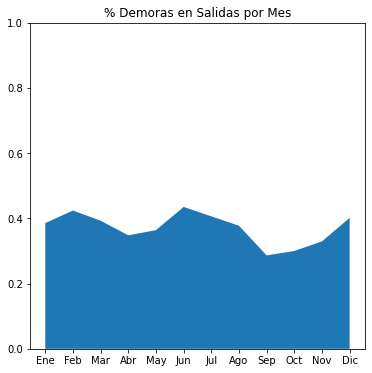

In [43]:
# Relizada con Matplotlib es un area plot
x = ["Ene", 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
y1 = (meses_demora.departure_delay)
fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=(6, 6))
ax1.fill_between(x, y1)
plt.ylim((0,1))
ax1.set_title('% Demoras en Salidas por Mes')


In [64]:
# De la misma manera siento que seria adecuado saber si hay una aerolinea 
# que suele tener mas demoras, para no comprar de esa aerolinea
aerolinea_demora = flights.groupby(['airline'], as_index=False)\
[ 'departure_delay'].apply(lambda x: (x>0).sum()/(x).count())
aerolinea_demora = aerolinea_demora.iloc[aerolinea_demora.departure_delay.sort_values(ascending = False).index]
aerolinea_demora

,airline,departure_delay
12,United Air Lines Inc.,0.503499
9,Southwest Airlines Co.,0.454854
10,Spirit Air Lines,0.451167
7,JetBlue Airways,0.388296
5,Frontier Airlines Inc.,0.386455
13,Virgin America,0.380859
1,American Airlines Inc.,0.343634
2,American Eagle Airlines Inc.,0.334399
4,Delta Air Lines Inc.,0.323860
11,US Airways Inc.,0.321134


Text(0.5, 1.0, 'Flights with Departure Delay by Airline')

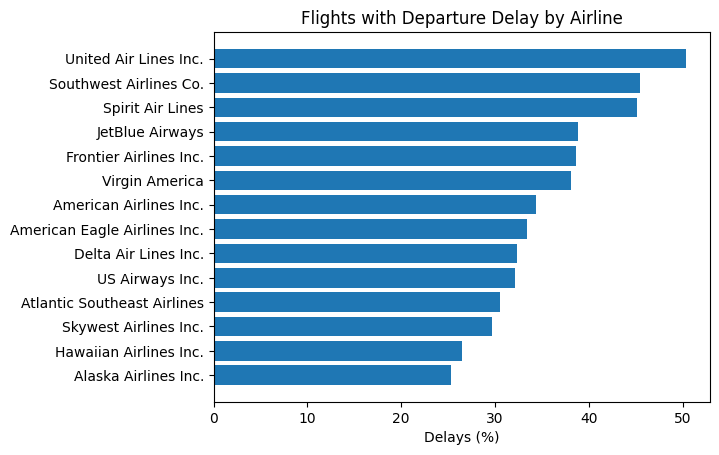

In [65]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
air = aerolinea_demora.airline
y_pos = np.arange(len(air))
performance = aerolinea_demora.departure_delay*100


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(air)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Delays (%)')
ax.set_title('Flights with Departure Delay by Airline')



In [71]:
# La siguiente grafica seran las rutas con los promedios de departure_delay mas grandes 
# De la misma manera siento que seria adecuado saber si hay una aerolinea 
# que suele tener mas demoras, para no comprar de esa aerolinea
puerto_demora = flights.groupby(['origin_city', 'destination_city'], as_index=False)\
['departure_delay'].mean()
puerto_demora = puerto_demora.iloc[puerto_demora.departure_delay.sort_values(ascending = False).head(10).index]
puerto_demora['ruta']=puerto_demora.origin_city+' - '+puerto_demora.destination_city
puerto_demora

,origin_city,destination_city,departure_delay,ruta
694,Chantilly,Trenton,341.0,Chantilly - Trenton
3047,Newburgh,West Palm Beach,256.0,Newburgh - West Palm Beach
3502,Raleigh,Indianapolis,209.0,Raleigh - Indianapolis
1051,Corpus Christi,Harlingen,206.0,Corpus Christi - Harlingen
4058,Springfield,Hays,206.0,Springfield - Hays
3552,Richmond,Columbia,190.0,Richmond - Columbia
4030,Sioux Falls,Lincoln,166.0,Sioux Falls - Lincoln
3043,Newburgh,Ft. Myers,153.0,Newburgh - Ft. Myers
2721,Missoula,Butte,151.0,Missoula - Butte
3054,Norfolk,Arlington,142.0,Norfolk - Arlington


Text(0, 0.5, 'Rutas')

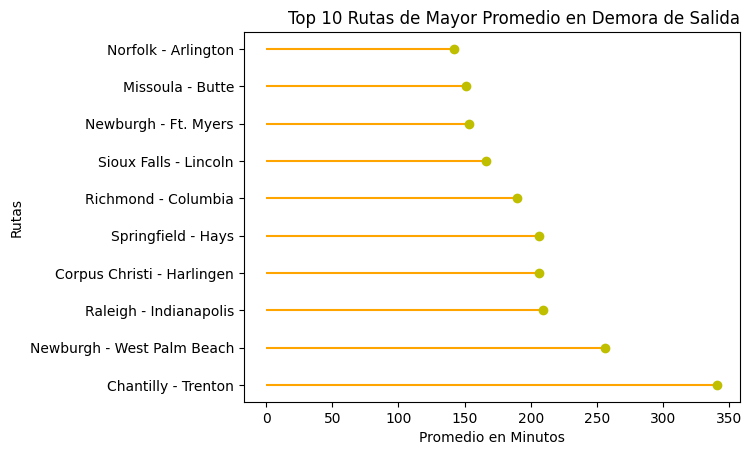

In [104]:
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it following the values:
my_range=range(1,len(puerto_demora.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.hlines(y=my_range, xmin=0, xmax=puerto_demora.departure_delay, color='orange')
plt.plot(puerto_demora.departure_delay, my_range, "yo")
 
# Add titles and axis names
plt.yticks(my_range, puerto_demora.ruta)
plt.title("Top 10 Rutas de Mayor Promedio en Demora de Salida", loc='right')
plt.xlabel('Promedio en Minutos')
plt.ylabel('Rutas')
 

In [101]:
# Me gustaria ver si hay una relacion entre los dos tipos de delays departure y arrival


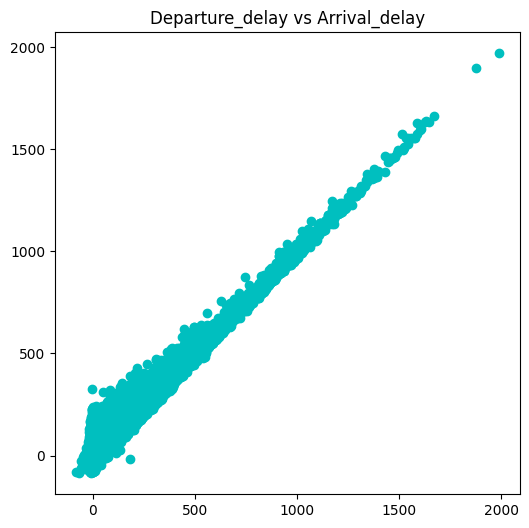

In [100]:
# Si hubo una relacion fuerte
x, y = flights.departure_delay, flights.arrival_delay
fig, axes = plt.subplots(figsize=(6, 6))
 # se realiza el scatterplot
axes.set_title('Departure_delay vs Arrival_delay')
axes.plot(x, y, 'co')



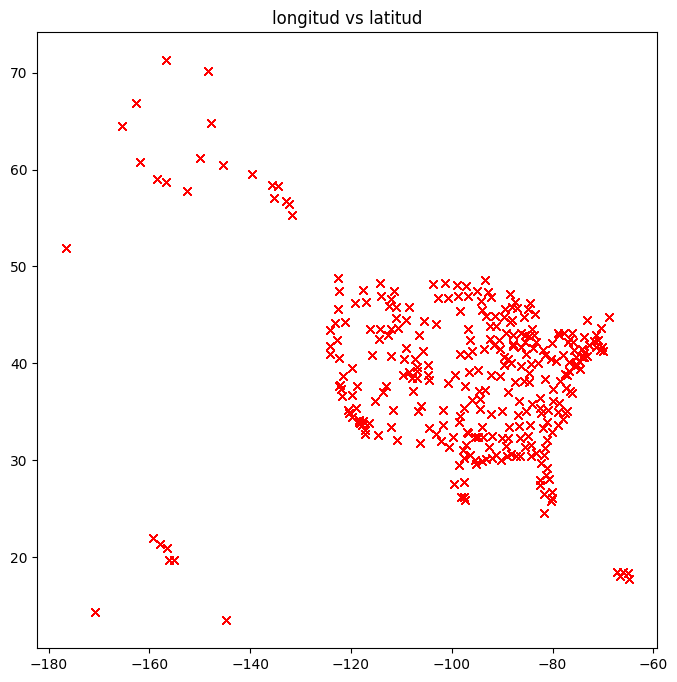

In [99]:
# Si realizo un scatterplot con las longitudes y latitudes seguro me qeuda algo cool, algun tipo mapa
# Si hubo una relacion fuerte
x, y = flights.origin_longitude, flights.origin_latitude
fig, axes = plt.subplots(figsize=(8, 8))
 # se realiza el scatterplot
axes.set_title('longitud vs latitud')
axes.plot(x, y, 'rx')
  # Beautifullll!!!!!
    #aunque claro, nada tiene que ver con la pregunta a contestar

<AxesSubplot:ylabel='departure_delay'>

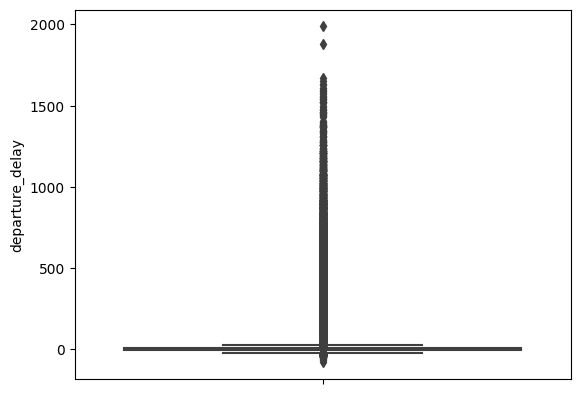

In [106]:
# Yo creo que un boxplot de los datos a predecir los departure_delays estaria bien 

sns.boxplot( y=flights.departure_delay )
#sns.plt.show()
#salio horrible

<AxesSubplot:ylabel='departure_delay'>

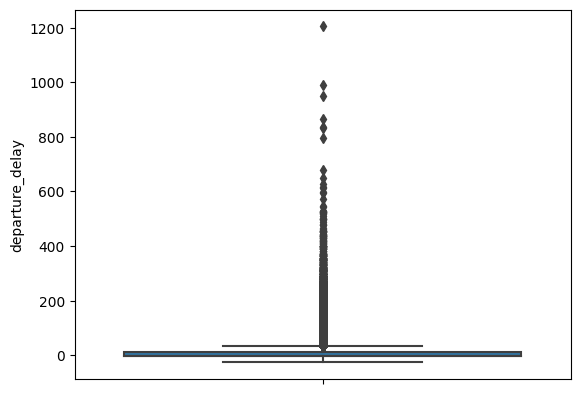

In [128]:
# Eses ultimo fue un fail asi que hare lo mismo pero solo de mi aeropuerto favorito
yyy=flights[flights.origin_iata_code == 'IAH']['departure_delay'] # son solo 146,622 vuelos
sns.boxplot( y=yyy )


# me rindo odio datos atipicos 